# Setup
To use the PRAW/Reddit API we will authenticate with Password Flow. Follow the [PRAW Steps](https://praw.readthedocs.io/en/stable/getting_started/authentication.html#password-flow). You will need to have a reddit account and to create an app for personal use [on Reddit](https://www.reddit.com/prefs/apps/).    
  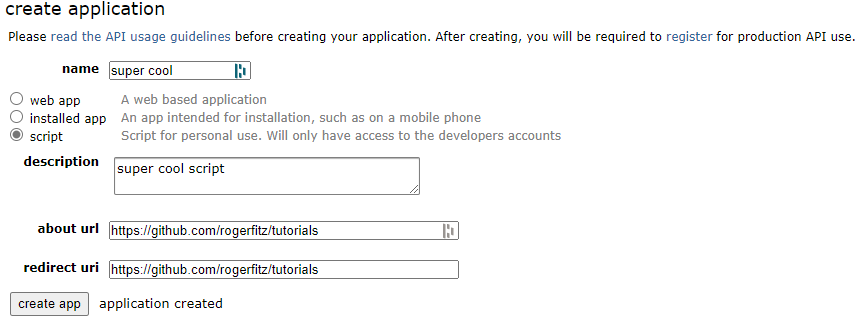
  
The redirect uri field is required but not really necessary to be accurate. I linked it to my github. 

Copy the secret_services.py.template file to secet_services.py and fill in everything starting with YOUR_. I've since deleted the "super cool" app so I'll save you the typing and don't try it, make your own.
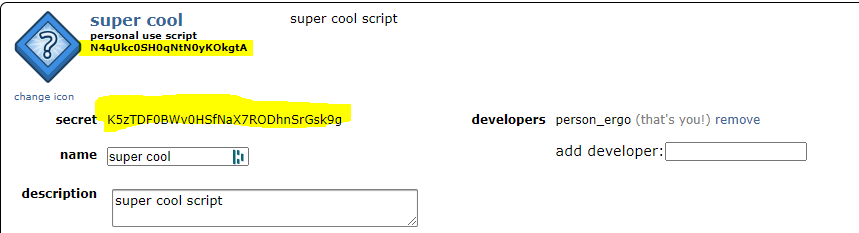


File snippet below
```python
import praw

reddit=praw.Reddit(
    client_id="YOUR_CLIENT_ID",
    client_secret="YOUR_CLIENT_SECRET",
    password="YOUR_REDDIT_PASSWORD",
    user_agent="see_app_description",
    username="YOUR_REDDIT_USERNAME",
)
```


In [1]:
#test that it works!
from secret_services import reddit
reddit.user.me()

Redditor(name='person_ergo')

If you had an issue with the above import you can either restart the notebook or use the reload command after changing secret_services


In [2]:
from importlib import reload
import secret_services
reload(secret_services)
reddit=secret_services.reddit
reddit.user.me()

Redditor(name='person_ergo')

# SETUP DONE! Let's Explore
To start with we'll do some basic exploration of subreddits and posts. In later notebooks I'll show you how to do more interesting things like discover popular sites to a subreddit or person, analyze popular keywords, detect where someone lives (roughly), and more.

In [3]:
#See the PRAW API https://praw.readthedocs.io/en/stable/getting_started/quick_start.html#common-tasks

In [4]:
for submission in reddit.subreddit("learnpython").hot(limit=10):
    print(submission.title)

Ask Anything Monday - Weekly Thread
Help with python
What projects could I do for back-end?
Data Analysis-projects and practice.
I'm 43. Want to be a software engineer. Am I crazy?
Should I take community college classes to learn python?
Silly question about for loop
Can I automate excel with web scraping?
Completed a beginner tutorial, what do I do next?
2.3*100 returns 229.99999999999997


For any subreddit you can look at the "hot" topics. Subreddits also have common properties like the description, when they were created, and number of subscribers. See https://praw.readthedocs.io/en/stable/code_overview/models/subreddit.html#praw.models.Subreddit. One basic thing you could do for user filtering is see how often people comment on NSFW subreddits or post to categorize accounts. I'm sure many people use alts for that even though it is not the "reddit way".

In [5]:
subreddit=reddit.subreddit("learnpython")#CHANGE to whatever you want here
subreddit.over18

False

In [6]:
subreddit.subscribers

554831

In [7]:
#I also like to use the .__dict__ command to quickly see things. Jupyter also has a help reader
subreddit.__dict__

{'display_name': 'learnpython',
 '_reddit': <praw.reddit.Reddit at 0x20e04d73a60>,
 '_fetched': True,
 '_path': 'r/learnpython/',
 'user_flair_background_color': None,
 'submit_text_html': '<!-- SC_OFF --><div class="md"><p>Post your questions about your python code here, or ask for code review of your python code. Please check the <a href="http://www.reddit.com/r/learnpython/wiki/index">wiki</a> and <a href="http://www.reddit.com/r/learnpython/wiki/FAQ">FAQ</a> before posting. For posting python resources, use <a href="/r/pythontips">/r/pythontips</a>. For general python discussion, use <a href="/r/python">/r/python</a>. To find a programming buddy, use <a href="/r/ProgrammingBuddies">/r/ProgrammingBuddies</a>. To show off your project, use <a href="/r/madeinpython">/r/madeinpython</a>. </p>\n\n<p>Please use the search function before submitting your thread to see if it has been asked before.</p>\n\n<p>If you&#39;re getting errors please include them. Also include your OS and python v

In [8]:
#If you're super lazy you can just write a generic thing to save everything here for scraping purposes

In [9]:
help(subreddit)

Help on Subreddit in module praw.models.reddit.subreddit object:

class Subreddit(praw.models.reddit.mixins.messageable.MessageableMixin, praw.models.listing.mixins.subreddit.SubredditListingMixin, praw.models.reddit.mixins.fullname.FullnameMixin, praw.models.reddit.base.RedditBase)
 |  Subreddit(reddit: 'praw.Reddit', display_name: Optional[str] = None, _data: Optional[Dict[str, Any]] = None)
 |  
 |  A class for Subreddits.
 |  
 |  To obtain an instance of this class for subreddit ``r/redditdev`` execute:
 |  
 |  .. code-block:: python
 |  
 |      subreddit = reddit.subreddit("redditdev")
 |  
 |  While ``r/all`` is not a real subreddit, it can still be treated like one. The
 |  following outputs the titles of the 25 hottest submissions in ``r/all``:
 |  
 |  .. code-block:: python
 |  
 |      for submission in reddit.subreddit("all").hot(limit=25):
 |          print(submission.title)
 |  
 |  Multiple subreddits can be combined with a ``+`` like so:
 |  
 |  .. code-block:: pyth

In [10]:
#Time filters! Lets do top by year
for submission in subreddit.top("year", limit=10):
    print(submission.title,submission.score)

As a Gift to the Community, I'm Making my Python Book Free for 72 hours! 2071
Just saved my company like $40 Grand a Year and I have no one else in my life that codes to tell, apart from my wife of course 1623
If you're looking for Python Projects, I have something to share with you. Just few days ago, I came across this list of 70+ Python Projects for Beginners, Intermediate and Experienced Developers. Hope it will be helpful to all the members of this community. 1550
[Update/Final Product] My dad is a programmer and I want to hand-sew a simple program as a gift to him. 1454
"Automate the Boring Stuff with Python" online course is free to sign up for the next few days with code FEB2021FREE 1399
"Automate the Boring Stuff with Python" online course is free to sign up for the next few days with code JAN2021FREE 1397
"Automate the Boring Stuff with Python" online course is free to sign up for the next few days with code OCT2020REALFREE 1334
I made a Python script that tracks Elon Musk's 

In [11]:
#Automate the boring stuff is very very popular. As well as WSB style content DOGE DOGE DOGE and a feel good story

In [12]:
for submission in subreddit.top("week", limit=10):
    print(submission.title,submission.score)

I'm 43. Want to be a software engineer. Am I crazy? 613
Landed my first job with Python, now freaking out a little 379
I'm new to python and have been struggling quite a bit, is that a bad sign? 216
Keep getting offered internships instead of jobs 193
What python projects have you worked on to help you learn coding fundamentals? 175
Noob Python question! please help lmao 166
Coding aside - what do I need before I'm job ready? 151
why is print a legal variable name? 117
Any way to hide python code? 94
Python helped me solve a mundane problem 76


In [13]:
#Basic analytics, what is the score as a percent of all readers? 
for submission in subreddit.top("year", limit=10):
    print(submission.title,submission.score/subreddit.subscribers)

As a Gift to the Community, I'm Making my Python Book Free for 72 hours! 0.0037200516914159447
Just saved my company like $40 Grand a Year and I have no one else in my life that codes to tell, apart from my wife of course 0.002928819766739782
If you're looking for Python Projects, I have something to share with you. Just few days ago, I came across this list of 70+ Python Projects for Beginners, Intermediate and Experienced Developers. Hope it will be helpful to all the members of this community. 0.002800852872316075
[Update/Final Product] My dad is a programmer and I want to hand-sew a simple program as a gift to him. 0.0026260248616245306
"Automate the Boring Stuff with Python" online course is free to sign up for the next few days with code FEB2021FREE 0.0025142791228319975
"Automate the Boring Stuff with Python" online course is free to sign up for the next few days with code JAN2021FREE 0.0025106744215806255
"Automate the Boring Stuff with Python" online course is free to sign up 

In [14]:
#Let's hook in pandas for an easier time doing analytics
import pandas as pd
rows=[]
for submission in subreddit.top("year", limit=10):
    #getattr is nice, could have also done .__dict__ but this gets us less cols so it's easier to see
    row={k:getattr(submission,k,"") for k in ["title","score","upvote_ratio"]}
    rows.append(row)
df=pd.DataFrame(rows)
df

,title,score,upvote_ratio
0,"As a Gift to the Community, I'm Making my Pyth...",2065,0.98
1,Just saved my company like $40 Grand a Year an...,1621,0.98
2,"If you're looking for Python Projects, I have ...",1550,0.98
3,[Update/Final Product] My dad is a programmer ...,1458,0.98
4,"""Automate the Boring Stuff with Python"" online...",1395,0.98
5,"""Automate the Boring Stuff with Python"" online...",1397,0.97
6,"""Automate the Boring Stuff with Python"" online...",1330,0.98
7,I made a Python script that tracks Elon Musk's...,1296,0.97
8,"""Automate the Boring Stuff with Python"" online...",1264,0.98
9,"""Automate the Boring Stuff with Python"" online...",1253,0.99


In [16]:
df['upvotes']=df['score']/df['upvote_ratio']
df['downvotes']=df['upvotes']-df['score']
df['upvotes/subscribers']=df['upvotes']/subreddit.subscribers
df

,title,score,upvote_ratio,upvotes,downvotes,upvotes/subscribers
0,"As a Gift to the Community, I'm Making my Pyth...",2065,0.98,2107.142857,42.142857,0.003798
1,Just saved my company like $40 Grand a Year an...,1621,0.98,1654.081633,33.081633,0.002981
2,"If you're looking for Python Projects, I have ...",1550,0.98,1581.632653,31.632653,0.002851
3,[Update/Final Product] My dad is a programmer ...,1458,0.98,1487.755102,29.755102,0.002681
4,"""Automate the Boring Stuff with Python"" online...",1395,0.98,1423.469388,28.469388,0.002566
5,"""Automate the Boring Stuff with Python"" online...",1397,0.97,1440.206186,43.206186,0.002596
6,"""Automate the Boring Stuff with Python"" online...",1330,0.98,1357.142857,27.142857,0.002446
7,I made a Python script that tracks Elon Musk's...,1296,0.97,1336.082474,40.082474,0.002408
8,"""Automate the Boring Stuff with Python"" online...",1264,0.98,1289.795918,25.795918,0.002325
9,"""Automate the Boring Stuff with Python"" online...",1253,0.99,1265.656566,12.656566,0.002281



Upvote ratio is suprisingly consistent, and I'm shocked how popular automate the boring stuff is. A very good tutorial series it must be.  
  
Also, be weary of analytics! To truly know the upvotes/subscribers counts we would need to have historical information for a subreddits subscriber count. And that is tricky to get using the API see this https://www.reddit.com/r/redditdev/comments/765f44/get_historic_subreddit_subscriber_counts_per_month/

# Closing
You've learned how to do some basic things with the reddit API. Continue with the tutorials or go off and build your own thing! TUTORIALS TODO